# **Bank Customer Behaviour Prediction**

We have been provided the data from a credit card processor company which has approximately 20000 records of the same number of users which are represented by their IDs to keep their privacy. The data is of customer credit card/debit card spend of three months(April, May & June) and we have to predict their expected average spend in the coming 3 months (July, August & September). We have been provided a separate dataset that has the average of three month (July, August & September) for some entries and not all which we have to predict based on the previous month data and other factors in the dataset.  The entries we have been provided can be our training dataset and we have to match our predicted average with the actual values. The model with the lowest Root Mean Square Percentage Error (RMSPE) will be selected. 

**Step 1: Setting up the work environment**

We will download the necessary packages and obtain the datasets. We wil have a quick overview of the datatypes. 

In [64]:
#getting packages
import pandas as pd        # For data manipulation and analysis
import numpy as np         # For numerical operations
import matplotlib.pyplot as plt    # For basic data visualization
import seaborn as sns      # For advanced data visualization
from scipy import stats # For statistics
from sklearn.linear_model import LinearRegression #For linear regression
from sklearn.metrics import mean_squared_error, make_scorer   #For Error measurement
from sklearn.model_selection import train_test_split #for model training and testing
from sklearn.metrics import r2_score #for model efficiency
from sklearn.linear_model import Ridge #for ridge regularization
from sklearn.linear_model import Lasso #for lasso regularization
from sklearn.tree import DecisionTreeRegressor #for decision tree regression
from sklearn.ensemble import RandomForestRegressor #for random forest regression
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV  #for Hyperparameter tuning 


In [2]:
#getting the dataset

bcd= pd.read_excel('C:\\Users\\sujoydutta\\Desktop\\Data analysis\\Projects\\Bank customer analysis\\CustomerBehaviorData.xlsx') 
bcd.head()

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,17051,3412.60,2909.34,1077.36,3084.50,4615.97,6693.0,19.0,10,2,...,1,108,97916.0,45253.64,47635.00,2,18,19947.0,Y,3448.84
1,11491,18133.76,3877.00,6123.78,5597.43,64620.00,6117.0,4.0,60,1,...,1,4,25125.0,12912.33,18369.00,3,49,20585.0,Y,3812.69
2,7433,6363.65,735.49,8799.00,13768.00,38266.00,2638.0,2.0,83,47,...,70,11,38546.0,93567.51,26713.00,47,49,13950.0,Y,9432.90
3,14606,12765.66,4429.16,16745.86,6360.00,29063.97,3711.0,12.0,2,16,...,43,1,180315.0,176394.48,35062.74,3,37,37018.0,Y,144.61
4,8381,27819.70,1944.00,7006.50,2228.50,1096.25,1065.0,15.0,13,61,...,2,14,13480.0,3167.00,19056.00,2,15,24274.0,Y,1887.89


In [3]:
#examining the dataset
bcd.shape

(20000, 39)

In [4]:
#seeing datatypes
bcd.dtypes

ID                         int64
cc_cons_apr              float64
dc_cons_apr              float64
cc_cons_may              float64
dc_cons_may              float64
cc_cons_jun              float64
dc_cons_jun              float64
cc_count_apr             float64
cc_count_may               int64
cc_count_jun               int64
dc_count_apr               int64
dc_count_may               int64
dc_count_jun               int64
card_lim                   int64
personal_loan_active       int64
vehicle_loan_active        int64
personal_loan_closed     float64
vehicle_loan_closed        int64
investment_1             float64
investment_2             float64
investment_3             float64
investment_4             float64
debit_amount_apr         float64
credit_amount_apr        float64
debit_count_apr          float64
credit_count_apr           int64
max_credit_amount_apr    float64
debit_amount_may         float64
credit_amount_may        float64
credit_count_may           int64
debit_coun

**Step 2: Data cleaning/formatting**

We are going to remove abnormally high/low values from the dataset in order to make sure we can take out better insights from the data. The columns in the dataset are going to be converted into proper format and all irregulairties would be removed. 


In [5]:
#seeing missing values
bcd.isnull().sum()

ID                       0
cc_cons_apr              0
dc_cons_apr              0
cc_cons_may              1
dc_cons_may              0
cc_cons_jun              0
dc_cons_jun              1
cc_count_apr             1
cc_count_may             0
cc_count_jun             0
dc_count_apr             0
dc_count_may             0
dc_count_jun             0
card_lim                 0
personal_loan_active     0
vehicle_loan_active      0
personal_loan_closed     1
vehicle_loan_closed      0
investment_1             0
investment_2             0
investment_3             2
investment_4             0
debit_amount_apr         0
credit_amount_apr        0
debit_count_apr          1
credit_count_apr         0
max_credit_amount_apr    0
debit_amount_may         0
credit_amount_may        0
credit_count_may         0
debit_count_may          0
max_credit_amount_may    0
debit_amount_jun         0
credit_amount_jun        0
credit_count_jun         0
debit_count_jun          0
max_credit_amount_jun    0
l

In [6]:
#dropping null values
bcd=bcd.dropna()
bcd

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,17051,3412.600,2909.34,1077.36,3084.50,4615.97,6693.00,19.0,10,2,...,1,108,97916.0,45253.64,47635.00,2,18,19947.0,Y,3448.84
1,11491,18133.760,3877.00,6123.78,5597.43,64620.00,6117.00,4.0,60,1,...,1,4,25125.0,12912.33,18369.00,3,49,20585.0,Y,3812.69
2,7433,6363.650,735.49,8799.00,13768.00,38266.00,2638.00,2.0,83,47,...,70,11,38546.0,93567.51,26713.00,47,49,13950.0,Y,9432.90
3,14606,12765.660,4429.16,16745.86,6360.00,29063.97,3711.00,12.0,2,16,...,43,1,180315.0,176394.48,35062.74,3,37,37018.0,Y,144.61
4,8381,27819.700,1944.00,7006.50,2228.50,1096.25,1065.00,15.0,13,61,...,2,14,13480.0,3167.00,19056.00,2,15,24274.0,Y,1887.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,12512,4641.500,5979.58,6008.61,4410.00,41743.00,1884.00,26.0,1,4,...,35,11,32944.0,105488.53,125470.83,21,50,58037.0,Y,7870.88
19996,14224,4994.450,2805.37,23214.00,5870.00,1041.00,1008.73,37.0,56,50,...,5,8,8850.0,77112.66,86559.00,62,38,24110.0,Y,3668.30
19997,18740,3262.145,2871.00,7335.25,11774.04,4130.00,1413.00,12.0,77,1,...,10,108,35819.0,57192.48,80627.00,2,18,1769.0,Y,5450.34
19998,18134,12824.010,4866.00,12242.48,284.00,15132.77,37911.00,67.0,1,4,...,11,12,39083.0,82039.00,24332.00,117,64,37255.0,Y,59.29


In [7]:
#Dropping irrelevant columns
columns_to_drop = ['loan_enq', 'personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed']

# Drop the specified columns
bcd = bcd.drop(columns=columns_to_drop)

# Display the modified DataFrame
bcd.head()

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active
0,17051,3412.60,2909.34,1077.36,3084.50,4615.97,6693.0,19.0,10,2,...,42852.00,1,108,97916.0,45253.64,47635.00,2,18,19947.0,3448.84
1,11491,18133.76,3877.00,6123.78,5597.43,64620.00,6117.0,4.0,60,1,...,24257.00,1,4,25125.0,12912.33,18369.00,3,49,20585.0,3812.69
2,7433,6363.65,735.49,8799.00,13768.00,38266.00,2638.0,2.0,83,47,...,38306.00,70,11,38546.0,93567.51,26713.00,47,49,13950.0,9432.90
3,14606,12765.66,4429.16,16745.86,6360.00,29063.97,3711.0,12.0,2,16,...,46132.05,43,1,180315.0,176394.48,35062.74,3,37,37018.0,144.61
4,8381,27819.70,1944.00,7006.50,2228.50,1096.25,1065.0,15.0,13,61,...,37191.00,2,14,13480.0,3167.00,19056.00,2,15,24274.0,1887.89


In [8]:
#making the data type appropriate
bcd['ID'] = bcd['ID'].astype(str)

In [9]:
#seeing new datatypes
bcd.dtypes

ID                        object
cc_cons_apr              float64
dc_cons_apr              float64
cc_cons_may              float64
dc_cons_may              float64
cc_cons_jun              float64
dc_cons_jun              float64
cc_count_apr             float64
cc_count_may               int64
cc_count_jun               int64
dc_count_apr               int64
dc_count_may               int64
dc_count_jun               int64
card_lim                   int64
investment_1             float64
investment_2             float64
investment_3             float64
investment_4             float64
debit_amount_apr         float64
credit_amount_apr        float64
debit_count_apr          float64
credit_count_apr           int64
max_credit_amount_apr    float64
debit_amount_may         float64
credit_amount_may        float64
credit_count_may           int64
debit_count_may            int64
max_credit_amount_may    float64
debit_amount_jun         float64
credit_amount_jun        float64
credit_cou

In [10]:
#function to handle outliers



def handle_extreme_values_iqr(data, variables, multiplier=1.5):
    
    modified_data = data.copy()
    
    for variable in variables:
        Q1 = data[variable].quantile(0.25)
        Q3 = data[variable].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        
       
        modified_data[variable] = data[variable].apply(lambda x: x if lower_bound <= x <= upper_bound else data[variable].median())
    
    return modified_data


In [11]:
#handling outliers for numerical variables

variables_to_handle = [
    'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun',
    'cc_count_apr', 'cc_count_may', 'cc_count_jun',
    'dc_count_apr', 'dc_count_may', 'dc_count_jun',
    'card_lim',
    'investment_1', 'investment_2', 'investment_3', 'investment_4',
    'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
    'debit_amount_may', 'credit_amount_may', 'credit_count_may', 'debit_count_may', 'max_credit_amount_may',
    'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun',
    'emi_active'
]

bcd = handle_extreme_values_iqr(bcd, variables_to_handle)
bcd

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active
0,17051,3412.600,2909.34,1077.36,3084.50,4615.97,6693.00,19.0,10.0,2.0,...,42852.00,1.0,108.0,97916.0,45253.64,47635.00,2.0,18,19947.0,3448.84
1,11491,18133.760,3877.00,6123.78,5597.43,6656.80,6117.00,4.0,60.0,1.0,...,24257.00,1.0,4.0,25125.0,12912.33,18369.00,3.0,49,20585.0,3812.69
2,7433,6363.650,735.49,8799.00,13768.00,6656.80,2638.00,2.0,83.0,47.0,...,38306.00,4.0,11.0,38546.0,93567.51,26713.00,7.0,49,13950.0,9432.90
3,14606,12765.660,4429.16,16745.86,6360.00,29063.97,3711.00,12.0,2.0,16.0,...,46132.05,4.0,1.0,31501.0,45716.16,35062.74,3.0,37,37018.0,144.61
4,8381,27819.700,1944.00,7006.50,2228.50,1096.25,1065.00,15.0,13.0,61.0,...,37191.00,2.0,14.0,13480.0,3167.00,19056.00,2.0,15,24274.0,1887.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,12512,4641.500,5979.58,6008.61,4410.00,6656.80,1884.00,26.0,1.0,4.0,...,45461.00,4.0,11.0,32944.0,105488.53,125470.83,21.0,50,58037.0,7870.88
19996,14224,4994.450,2805.37,23214.00,5870.00,1041.00,1008.73,37.0,56.0,50.0,...,85422.00,5.0,8.0,8850.0,77112.66,86559.00,7.0,38,24110.0,3668.30
19997,18740,3262.145,2871.00,7335.25,11774.04,4130.00,1413.00,12.0,77.0,1.0,...,68985.86,10.0,108.0,35819.0,57192.48,80627.00,2.0,18,1769.0,5450.34
19998,18134,12824.010,4866.00,12242.48,284.00,15132.77,3326.00,67.0,1.0,4.0,...,13558.00,11.0,12.0,39083.0,82039.00,24332.00,7.0,64,37255.0,59.29


**Step 3:Feature engineering**

We are going to combine and modify existing variables to help us explore newer patterns and relationships. Our aim is to find out what affects the credit card consumption of the customers

In [12]:
#making new feature total customer investment
bcd['total_customer_investment']=bcd['investment_1']+bcd['investment_2']+bcd['investment_3']+bcd['investment_4']


In [13]:
#transaction count monthly
bcd['trans_cnt_apr']=bcd['cc_count_apr']+bcd['dc_count_apr']
bcd['trans_cnt_may']=bcd['cc_count_may']+bcd['dc_count_may']
bcd['trans_cnt_jun']=bcd['cc_count_jun']+bcd['dc_count_jun']


In [14]:
#  Credit Card Utilization Monthly Rate 
bcd['card_utilization_apr'] = bcd['credit_amount_apr'] / bcd['max_credit_amount_apr']
bcd['card_utilization_may'] = bcd['credit_amount_may'] / bcd['max_credit_amount_may']
bcd['card_utilization_jun'] = bcd['credit_amount_jun'] / bcd['max_credit_amount_jun']

In [15]:
# Credit card utilization ratio per individual
bcd['Credit_Card_Utilization_Ratio'] = (bcd['cc_count_apr'] + bcd['cc_count_may'] + bcd['cc_count_jun']) / (bcd['card_lim']+1) * 100

In [16]:
#removing obsolete features 
obsolete_columns = ['cc_count_apr','dc_count_apr','cc_count_may','dc_count_may','cc_count_jun','dc_count_jun',
                    'credit_amount_apr','max_credit_amount_apr','credit_amount_may','max_credit_amount_may',
                    'credit_amount_jun','max_credit_amount_jun','investment_1','investment_2','investment_3','investment_4',
                   'cc_count_apr','cc_count_may','cc_count_jun','card_lim']

bcd.drop(columns=obsolete_columns, inplace=True)


bcd.head()

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,debit_amount_apr,debit_count_apr,credit_count_apr,...,debit_count_jun,emi_active,total_customer_investment,trans_cnt_apr,trans_cnt_may,trans_cnt_jun,card_utilization_apr,card_utilization_may,card_utilization_jun,Credit_Card_Utilization_Ratio
0,17051,3412.60,2909.34,1077.36,3084.50,4615.97,6693.0,25210.23,103.0,36.0,...,18,3448.84,156378.20,72.0,11.0,44.0,0.963378,0.437640,2.388078,0.008659
1,11491,18133.76,3877.00,6123.78,5597.43,6656.80,6117.0,30937.00,40.0,35.0,...,49,3812.69,60558.81,8.0,61.0,18.0,2.001024,0.965453,0.892349,0.057017
2,7433,6363.65,735.49,8799.00,13768.00,6656.80,2638.0,12940.25,11.0,3.0,...,49,9432.90,209702.60,6.0,88.0,89.0,1.370422,0.993774,1.914910,0.036667
3,14606,12765.66,4429.16,16745.86,6360.00,29063.97,3711.0,78122.15,42.0,26.0,...,37,144.61,460017.00,36.0,14.0,74.0,0.687945,1.464463,0.947181,0.019355
4,8381,27819.70,1944.00,7006.50,2228.50,1096.25,1065.0,6855.71,46.0,35.0,...,15,1887.89,26416.73,22.0,18.0,141.0,2.490327,2.758976,0.785037,0.024586


In [17]:
#examining new dataset
bcd.dtypes

ID                                object
cc_cons_apr                      float64
dc_cons_apr                      float64
cc_cons_may                      float64
dc_cons_may                      float64
cc_cons_jun                      float64
dc_cons_jun                      float64
debit_amount_apr                 float64
debit_count_apr                  float64
credit_count_apr                 float64
debit_amount_may                 float64
credit_count_may                 float64
debit_count_may                  float64
debit_amount_jun                 float64
credit_count_jun                 float64
debit_count_jun                    int64
emi_active                       float64
total_customer_investment        float64
trans_cnt_apr                    float64
trans_cnt_may                    float64
trans_cnt_jun                    float64
card_utilization_apr             float64
card_utilization_may             float64
card_utilization_jun             float64
Credit_Card_Util

**Step 4:Exploratory Data Analysis**

We can explore the dataset to get some sample insights and get to know what is happening. Charts will be used to provide key insights. 

In [18]:
# Correlation matrix
selected_variables = bcd[['cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun',
                          'dc_cons_jun', 'debit_amount_apr', 'debit_count_apr', 'credit_count_apr',
                          'debit_amount_may', 'credit_count_may', 'debit_count_may', 'debit_amount_jun',
                          'credit_count_jun', 'debit_count_jun', 'emi_active', 'total_customer_investment',
                          'trans_cnt_apr', 'trans_cnt_may', 'trans_cnt_jun', 'card_utilization_apr',
                          'card_utilization_may', 'card_utilization_jun', 'Credit_Card_Utilization_Ratio']]

# Calculate the correlation matrix
correlation_matrix = selected_variables.corr()
correlation_matrix


,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,debit_amount_apr,debit_count_apr,credit_count_apr,debit_amount_may,...,debit_count_jun,emi_active,total_customer_investment,trans_cnt_apr,trans_cnt_may,trans_cnt_jun,card_utilization_apr,card_utilization_may,card_utilization_jun,Credit_Card_Utilization_Ratio
cc_cons_apr,1.000000,-0.001275,0.004917,0.000080,-0.014216,-0.000528,0.005683,0.002309,0.002384,0.006166,...,0.005076,0.004577,-0.010084,-0.003899,0.000251,0.009876,0.011331,-0.000113,0.008657,0.008048
dc_cons_apr,-0.001275,1.000000,-0.000803,-0.004023,-0.006619,-0.010639,-0.005637,-0.002008,0.002238,0.001733,...,-0.008494,0.008298,-0.012977,-0.006507,0.014846,0.001338,-0.000304,-0.002418,-0.002367,-0.012454
cc_cons_may,0.004917,-0.000803,1.000000,-0.002010,-0.001732,0.016929,-0.008218,0.006594,-0.005534,-0.004004,...,-0.002557,-0.000655,0.004311,-0.013047,0.017725,0.007400,-0.005396,-0.001411,0.007293,-0.002805
dc_cons_may,0.000080,-0.004023,-0.002010,1.000000,0.004554,-0.012510,0.002463,0.010275,-0.000416,0.017780,...,-0.000246,-0.004041,-0.009223,0.004395,-0.002889,-0.014242,-0.001061,0.000174,-0.012344,0.011316
cc_cons_jun,-0.014216,-0.006619,-0.001732,0.004554,1.000000,-0.006032,0.000919,-0.001655,0.003518,0.000497,...,0.002539,0.000558,-0.002129,0.004365,-0.007078,0.000143,0.005441,-0.003373,-0.005121,-0.005241
dc_cons_jun,-0.000528,-0.010639,0.016929,-0.012510,-0.006032,1.000000,0.002009,0.007764,0.008216,-0.003704,...,0.001351,-0.002844,-0.013059,-0.011500,0.004006,0.002707,-0.006388,-0.003798,-0.008001,0.009788
debit_amount_apr,0.005683,-0.005637,-0.008218,0.002463,0.000919,0.002009,1.000000,-0.004088,0.005121,-0.000274,...,0.014925,-0.007553,0.005414,0.006823,-0.006631,-0.001943,-0.015463,0.003836,-0.002425,-0.008037
debit_count_apr,0.002309,-0.002008,0.006594,0.010275,-0.001655,0.007764,-0.004088,1.000000,-0.009258,0.002183,...,0.007836,0.001472,0.000465,0.003614,-0.007309,0.015748,0.002351,-0.006587,0.001853,0.011270
credit_count_apr,0.002384,0.002238,-0.005534,-0.000416,0.003518,0.008216,0.005121,-0.009258,1.000000,-0.004989,...,0.002141,-0.008563,-0.005854,0.000232,-0.006763,0.001843,-0.002724,-0.002513,-0.011333,0.001876
debit_amount_may,0.006166,0.001733,-0.004004,0.017780,0.000497,-0.003704,-0.000274,0.002183,-0.004989,1.000000,...,0.003045,0.014026,0.001553,-0.003006,-0.006830,-0.021671,0.013993,-0.004936,-0.000703,-0.005148


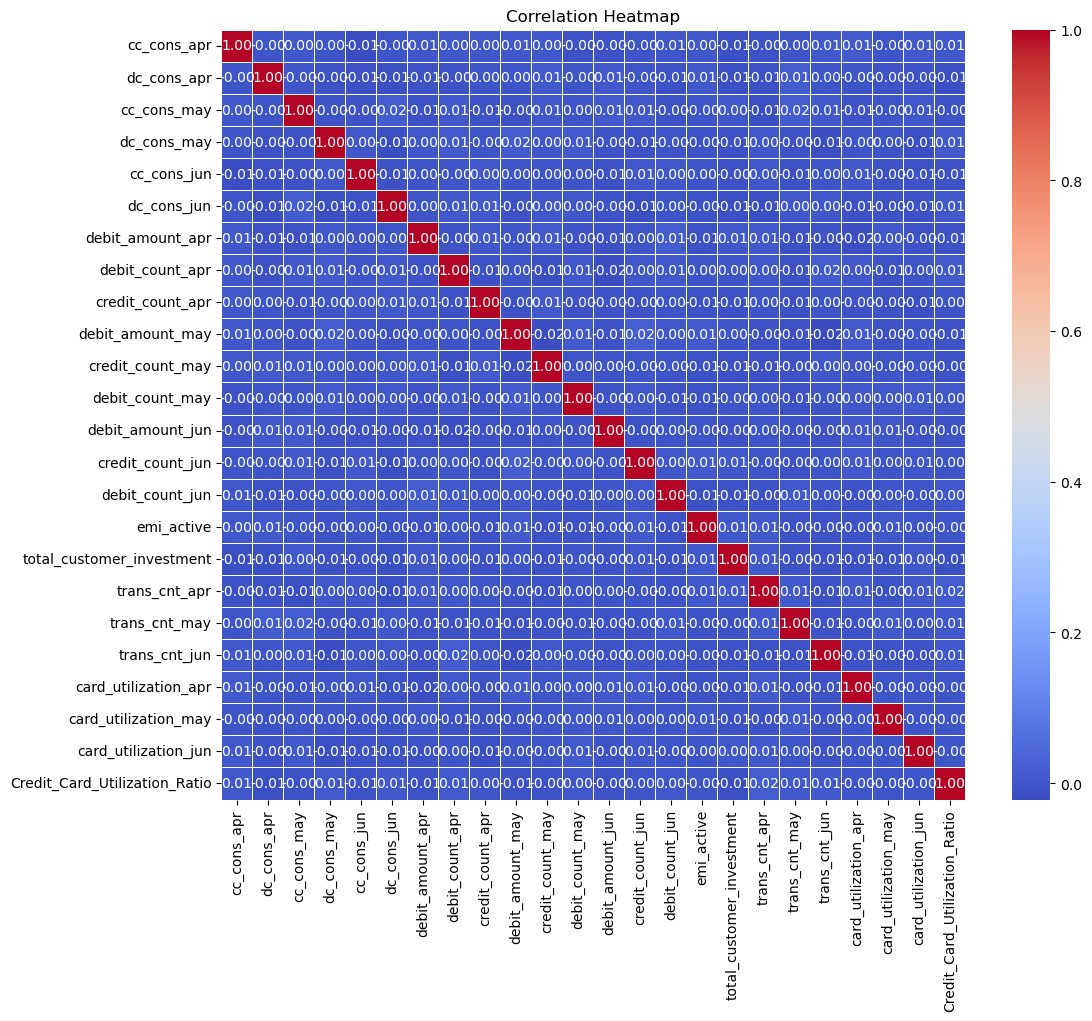

In [19]:
# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

*No strong correlation found among the variables which is a good sign as there is no possibility of multi-collinearity*

In [20]:
#Seeing the IDs with highest utilization ratio
sorted_df = bcd.sort_values(by='Credit_Card_Utilization_Ratio', ascending=False)


top_10_ids = sorted_df[['ID', 'Credit_Card_Utilization_Ratio']].head(10)


print(top_10_ids)

          ID  Credit_Card_Utilization_Ratio
18220   3894                        27300.0
10316  16012                        17600.0
12321  11438                        16400.0
1657    7326                        16100.0
17668  14022                        14700.0
8533    9231                        13700.0
13302   1688                        13600.0
9844    4233                        11600.0
16896  19980                        11300.0
18350   1341                        11300.0


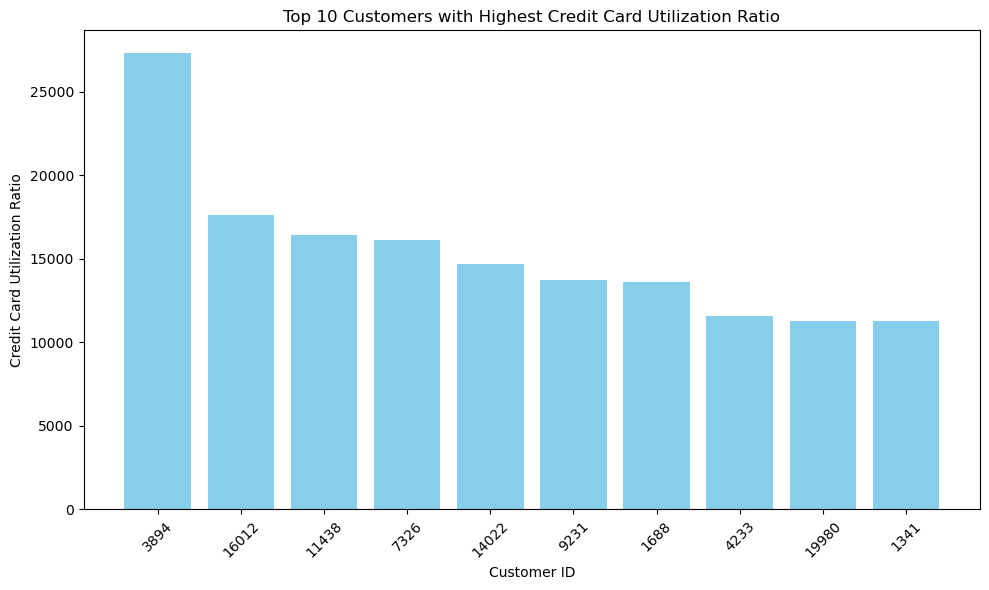

In [21]:
# Chart vizualization of the top 10 IDs with highest utilization ratio
plt.figure(figsize=(10, 6))
plt.bar(top_10_ids['ID'], top_10_ids['Credit_Card_Utilization_Ratio'], color='skyblue')
plt.xlabel('Customer ID')
plt.ylabel('Credit Card Utilization Ratio')
plt.title('Top 10 Customers with Highest Credit Card Utilization Ratio')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

*This ratio is supposed to be in decimals but it is whole number which is strange. Actually they are card defaulters whose limit is zero but however they have managed to spend a substantial amount with their credit card which can be attributed to the lapse of the bank authorities.(The formula had plus 1 in the denominator to catch them!)* 

In [22]:
#Top 5 highest investors
sorted_df = bcd.sort_values(by='total_customer_investment', ascending=False)

# Get the top 5 IDs with the highest customer investment
top_5_investment_ids = sorted_df[['ID', 'total_customer_investment']].head(5)

# Print or display the result
print(top_5_investment_ids)

         ID  total_customer_investment
16320  4460               934423.25000
10260   444               930183.12023
19589  6242               926843.37000
2876   4519               892290.20000
6810   8803               884849.37000


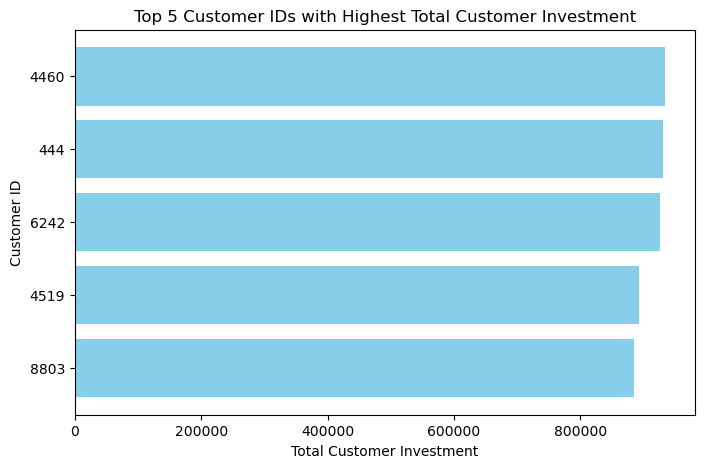

In [23]:
# Chart vizualization of the top 5 IDs with highest investment
plt.figure(figsize=(8, 5))
plt.barh(top_5_investment_ids['ID'], top_5_investment_ids['total_customer_investment'], color='skyblue')
plt.xlabel('Total Customer Investment')
plt.ylabel('Customer ID')
plt.title('Top 5 Customer IDs with Highest Total Customer Investment')
plt.gca().invert_yaxis() 

*These are the IDs with the highest investment and care must be taken to retain these customers*

**Step 5: Model Building**

Now it is time to build a regression model that is going to use the independent variables to predict the customer spend of July, August and September. The model with highest R squared value will be used. 

In [24]:
# Loading the validation dataset
ccp = pd.read_excel('C:\\Users\\sujoydutta\\Desktop\\Data analysis\\Projects\\Bank customer analysis\\CreditConsumptionData.xlsx')
ccp.head()

,ID,cc_cons
0,12554,20014.0
1,17645,10173.0
2,7604,16095.0
3,1590,7707.0
4,16556,96408.0


In [25]:
#making the data type appropriate
ccp['ID'] = ccp['ID'].astype(str)

In [26]:
# Assuming 'ID' is the common column
merged_df = bcd.merge(ccp[['ID', 'cc_cons']], on='ID', how='left')
merged_df.head()

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,debit_amount_apr,debit_count_apr,credit_count_apr,...,emi_active,total_customer_investment,trans_cnt_apr,trans_cnt_may,trans_cnt_jun,card_utilization_apr,card_utilization_may,card_utilization_jun,Credit_Card_Utilization_Ratio,cc_cons
0,17051,3412.60,2909.34,1077.36,3084.50,4615.97,6693.0,25210.23,103.0,36.0,...,3448.84,156378.20,72.0,11.0,44.0,0.963378,0.437640,2.388078,0.008659,13434.0
1,11491,18133.76,3877.00,6123.78,5597.43,6656.80,6117.0,30937.00,40.0,35.0,...,3812.69,60558.81,8.0,61.0,18.0,2.001024,0.965453,0.892349,0.057017,449.0
2,7433,6363.65,735.49,8799.00,13768.00,6656.80,2638.0,12940.25,11.0,3.0,...,9432.90,209702.60,6.0,88.0,89.0,1.370422,0.993774,1.914910,0.036667,11968.0
3,14606,12765.66,4429.16,16745.86,6360.00,29063.97,3711.0,78122.15,42.0,26.0,...,144.61,460017.00,36.0,14.0,74.0,0.687945,1.464463,0.947181,0.019355,32029.0
4,8381,27819.70,1944.00,7006.50,2228.50,1096.25,1065.0,6855.71,46.0,35.0,...,1887.89,26416.73,22.0,18.0,141.0,2.490327,2.758976,0.785037,0.024586,16394.0


In [27]:
# Splitting data into known and missing values
known_data = merged_df[merged_df['cc_cons'].notna()]
missing_data = merged_df[merged_df['cc_cons'].isna()]


In [28]:
#selecting feature and target variables
X  = known_data[['cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun',
        'debit_amount_apr', 'debit_count_apr', 'credit_count_apr', 'debit_amount_may', 'credit_count_may',
        'debit_count_may', 'debit_amount_jun', 'credit_count_jun', 'debit_count_jun', 'emi_active',
        'total_customer_investment', 'trans_cnt_apr', 'trans_cnt_may', 'trans_cnt_jun',
        'card_utilization_apr', 'card_utilization_may', 'card_utilization_jun',
        'Credit_Card_Utilization_Ratio']]

y = known_data['cc_cons']


In [29]:
# Root Mean Square Percentage Error (RMSPE)
def rmspe(y_true, y_pred):
    return np.sqrt(np.mean(((y_true - y_pred) / y_true) ** 2)) * 100

In [30]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [31]:
# Train your model (e.g., Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [32]:
# Making predictions on the test set
y_pred_lin = model.predict(X_test)

In [33]:
# Calculate RMSPE for linear regression model
rmspe_value = rmspe(y_test, y_pred_lin)
print("RMSPE on Test Set:", rmspe_value)

RMSPE on Test Set: 10656.049078046442


In [34]:
# Ridge Regression model
ridge_model = Ridge(alpha=1.0)  
ridge_model.fit(X_train, y_train)

Ridge()

In [35]:
#  predictions on the test set
y_pred_ridge = ridge_model.predict(X_test)


In [36]:
# Calculate RMSPE for Ridge Regression model
rmspe_value = rmspe(y_test, y_pred_ridge)
print("RMSPE on Test Set:", rmspe_value)

RMSPE on Test Set: 10656.048912840028


In [37]:
# Lasso Regression model
lasso_model = Lasso(alpha=1.0) 
lasso_model.fit(X_train, y_train)

Lasso()

In [38]:
# predictions on the test set
y_pred_lasso = lasso_model.predict(X_test)

In [39]:
# Calculate RMSPE for Lasso Regression model
rmspe_value = rmspe(y_test, y_pred_lasso)
print("RMSPE on Test Set:", rmspe_value)

RMSPE on Test Set: 10656.011804731375


In [40]:
# Decision Tree Regression model
tree_model = DecisionTreeRegressor(max_depth=5) 
tree_model.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=5)

In [41]:
# predictions on the test set
y_pred_tree = tree_model.predict(X_test)

In [42]:
# Calculate RMSPE for Decision Tree Regression model
rmspe_value = rmspe(y_test, y_pred_tree)
print("RMSPE on Test Set:", rmspe_value)

RMSPE on Test Set: 10112.220502139253


In [43]:
# Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=400) 
rf_model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=400)

In [44]:
# predictions on the test set
y_pred_rf = rf_model.predict(X_test)

In [45]:
# Calculate RMSPE for Random Forest Regression mode
rmspe_value = rmspe(y_test, y_pred_rf)
print("RMSPE on Test Set:", rmspe_value)

RMSPE on Test Set: 14118.07642945612


*After trying every available regression model, we are unable to get good results as they are in negative,so the next step of hyperparameter tuning needs to be taken*

**Step 6:Hyperparameter Tuning**

In this step, we are going to upgrade the Decision Tree regressor model so that it is able to select the best hyper parameters which would help it predict the target variable. We have selected the Decision Tree regressor model because it has the lowest error. 

In [73]:
# Defining the hyperparameters and their possible values
param_dist = {
    'max_depth': [None] + list(np.arange(10, 110, 10)),
    'min_samples_split': [2, 5, 10, 20, 30, 40, 50],
    'min_samples_leaf': [1, 2, 4, 8, 16],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['mse', 'friedman_mse', 'mae'],
    'splitter': ['best', 'random'],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4],
    'max_leaf_nodes': [None] + list(np.arange(10, 110, 10)),
    'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4],
    'random_state': [42]  
}


In [74]:
# Decision Tree Regressor
dtree = DecisionTreeRegressor(random_state=42)

In [75]:
# scorer based on RMSE
scoring = make_scorer(rmspe, greater_is_better=False)


In [76]:
# RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=dtree,
    param_distributions=param_dist,
    n_iter=50,  # Adjust the number of iterations
    cv=5,
    scoring=scoring,
    n_jobs=-1  # Use all available CPU cores for parallel processing
)

In [77]:
# Fitting the GridSearchCV object to training data
random_search.fit(X_train, y_train)


C:\Users\sujoydutta\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf]
  warnings.warn(
C:\Users\sujoydutta\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:962: RuntimeWarning: invalid value encountered in subtract
  (array - array_means[:, np.newaxis]) ** 2, axis=1, weights=weights
C:\Users\sujoydutta\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\sujoydutta\anaconda3\lib\site-packages\sklearn\tree\_classes.py:404: FutureWarning: Criterion 'mae' was depre

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'friedman_mse',
                                                      'mae'],
                                        'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_leaf_nodes': [None, 10, 20, 30, 40,
                                                           50, 60, 70, 80, 90,
                                                           100],
                                        'min_impurity_decrease': [0.0, 0.1, 0.2,
                                                                  0.3, 0.4],
                                        'min_samples_leaf': [1, 2, 4, 8, 16],
                                        'min_samples_split': [2, 5, 10, 20, 30,
                                                              40, 50],
                                        'min_weight_fraction_leaf': [0.0, 0.1,
                                                                     0.2, 0.3,
                                                                     0.4],
                                        'random_state': [42],
                                        'splitter': ['best', 'random']},
                   scoring=make_scorer(rmspe, greater_is_better=False))

In [78]:
# Getting the best hyperparameters from the grid search
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'splitter': 'random', 'random_state': 42, 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 2, 'min_samples_leaf': 2, 'min_impurity_decrease': 0.0, 'max_leaf_nodes': 90, 'max_features': 'auto', 'max_depth': 70, 'criterion': 'mae'}


In [80]:
# Putting the best hyperparameters in Decision Tree Regressor
best_dtree = DecisionTreeRegressor(**best_params)


In [81]:
# Train the model on the training data
best_dtree.fit(X_train, y_train)


C:\Users\sujoydutta\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\sujoydutta\anaconda3\lib\site-packages\sklearn\tree\_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


DecisionTreeRegressor(criterion='mae', max_depth=70, max_features='auto',
                      max_leaf_nodes=90, min_samples_leaf=2, random_state=42,
                      splitter='random')

In [82]:
# Make predictions on the test data
y_pred_best_dtree = best_dtree.predict(X_test)


In [83]:
# Calculate RMSE on the test data
rmspe_value = rmspe(y_test, y_pred_best_dtree)
print("RMSPE on Test Set:", rmspe_value)

RMSPE on Test Set: 5549.876172232738


*We can see that after Hyperparameter tuning we are able to bring down the error to almost half the original value and hence we must select this model to predict the missing values.*

**Step 7:Model validation**

This is the final step in this exercise and in this step we are going to predict the missing values of the dataset using the decision tree regressor model we perfected through hyperparameter tuning.

In [89]:
#getting the dependent variables
X_missing = missing_data[['cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun',
        'debit_amount_apr', 'debit_count_apr', 'credit_count_apr', 'debit_amount_may', 'credit_count_may',
        'debit_count_may', 'debit_amount_jun', 'credit_count_jun', 'debit_count_jun', 'emi_active',
        'total_customer_investment', 'trans_cnt_apr', 'trans_cnt_may', 'trans_cnt_jun',
        'card_utilization_apr', 'card_utilization_may', 'card_utilization_jun',
        'Credit_Card_Utilization_Ratio']]


In [90]:
 
# Predict the missing values
missing_data['cc_cons'] = best_dtree.predict(X_missing)
missing_data['cc_cons']

C:\Users\sujoydutta\AppData\Local\Temp\ipykernel_12120\1594784132.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_data['cc_cons'] = best_dtree.predict(X_missing)


14995    12708.0
14996    11711.0
14997    13396.5
14998    12708.0
14999    13396.5
          ...   
19988    13396.5
19989    12708.0
19990    12171.5
19991    13396.5
19992    12708.0
Name: cc_cons, Length: 4998, dtype: float64

In [ ]:
# Output data frame with predicted values
output_df = missing_data[['ID', 'cc_cons']]
output_df.head()

In [95]:
# Making the final dataset
final_data = pd.concat([known_data, output_df], axis=0)

# Reset the index of the final DataFrame
final_data.reset_index(drop=True, inplace=True)

In [96]:
# Saving the final DataFrame to an Excel file
final_data.to_excel('final_data_with_missing_predictions.xlsx', index=False)